# Visualising Social Metrics

This notebook generates all the proxemic figures used in 
[our paper](https://doi.org/10.1145/3411764.3445729) on _Proxemics and Social 
Interactions in an Instrumented Virtual Reality Workshop_. 

## Using this Notebook, Code, or Data
This notebook and all of the resources included here are released on a 
[Mozilla Public License 2.0](https://www.mozilla.org/en-US/MPL/2.0/).  The data 
is released under [CC-BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).
To cite the paper, the bespoke logging client, the dataset, or this notebook 
please see the [README.md](https://github.com/ayman/hubs-research-2021/blob/main/README.md) 
or the [DOI in the ACM Digital Library](https://doi.org/10.1145/3411764.3445729).

## Requirements
⚠️ `seaborn >= 0.11.0` is required.

In [2]:
import pickle
import pandas as pd
import numpy as np
import scipy
from scipy import  spatial
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Circle
from matplotlib.pyplot import figure

# %matplotlib notebook

Load our past pickles and csv data.

In [3]:
with open("outputs/social_metrics_groups.pkl", "rb") as f:
    loaded_matrices = pickle.load(f)

In [4]:
import sys
sys.version
pickle.format_version

'4.0'

## Generating Visualisations

Generating visualisations from Hubs positional logs also requires
using Mozilla Spoke to provide context to the coordinate system.  The
coordinates returned by the logger are based on the coordinates of the
room design, and can be checked by open the room assets in Spoke.

For our visualisations, we use a rotated view of the room layout, which
results in some confusing naming schemes here as the X and Z axis are 
rotated. Y, which represents height within the Hubs coordinate system, 
is unchanged.  The assets for Outdoor Meetup and Lake Office top down 
views where taken directly from Spoke.

### Figure 3: Audio Models

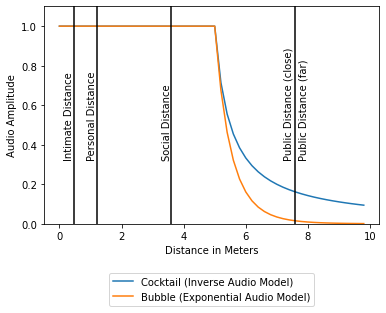

In [6]:
# Audio Models Figure

ref_dist = 5.0
rolloff = 10.0

def inverse(d):
    return (ref_dist / (ref_dist + rolloff * (np.maximum(d, ref_dist) - ref_dist)))

def exponential(d):
    return pow((np.maximum(d, ref_dist) / ref_dist), -rolloff)

plt.figure()

plt.ylim((0, 1.1)) 

x = np.arange(0, 10, .2)
y = [inverse(d) for d in x]

x2 = np.arange(0, 10, .2)
y2 = [exponential(d) for d in x]

plt.plot(x,y, label="Cocktail (Inverse Audio Model)")
plt.plot(x2,y2, label="Bubble (Exponential Audio Model)")

plt.xlabel("Distance in Meters")
plt.ylabel("Audio Amplitude")

plt.axvline(x=.46,  c='black')
plt.axvline(x=1.2, c='black')
plt.axvline(x=3.6 , c='black')
plt.axvline(x=7.6 , c='black')
plt.text(.16, .33, "Intimate Distance", rotation=90)
plt.text(.9, .33, "Personal Distance", rotation=90)
plt.text(3.3, .33, "Social Distance", rotation=90)
plt.text(7.2, .33, "Public Distance (close)", rotation=90)
plt.text(7.7, .33, "Public Distance (far)", rotation=90)

lgd = plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))

plt.savefig("outputs/audiomodels.pdf", format='pdf', bbox_inches="tight", dpi=1200) 

In [7]:
# All dists as freq line
# dists.append(dist[np.triu_indices(n=dist.shape[0],k=1)].ravel())


def get_all_dist_a(group_label):
    g = loaded_matrices[group_label]["dist_mat"]
    
    dists = []
    
    for frame in g:
        mat = g[frame]
        dists.append(mat[np.triu_indices(n=mat.shape[0],k=1)].ravel())
        
    return np.array(dists).flatten() 


# Small Group Slices
g1_1 = get_all_dist_a("group1_1")
g1_2 = get_all_dist_a("group1_2")
g2_1 = get_all_dist_a("group2_1")
g2_2 = get_all_dist_a("group2_2")
g3_1 = get_all_dist_a("group3_1")
g3_2 = get_all_dist_a("group3_2")
g4_1 = get_all_dist_a("group4_1")
g4_2 = get_all_dist_a("group4_2")

g1 = np.append(loaded_matrices["group1_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group1_1"]["mins_by_frame"])].flatten(), loaded_matrices["group1_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group1_2"]["mins_by_frame"])].flatten())
g2 = np.append(loaded_matrices["group2_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group2_1"]["mins_by_frame"])].flatten(), loaded_matrices["group2_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group2_2"]["mins_by_frame"])].flatten())
g3 = np.append(loaded_matrices["group3_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group3_1"]["mins_by_frame"])].flatten(), loaded_matrices["group3_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group3_2"]["mins_by_frame"])].flatten())
g4 = np.append(loaded_matrices["group4_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group4_1"]["mins_by_frame"])].flatten(), loaded_matrices["group4_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group4_2"]["mins_by_frame"])].flatten())

#Large Group Slices


In [8]:
# Frequency diagrams used in Figures 4 and 6

def draw_freq(title, groups, labels, log=False, draw_line = True, n_bins=50):

    bins = np.linspace(0, 8.0, n_bins)
        
    
    colours = ["#035efc", "#fc8403"]

    plt.figure()
    if log:
        plt.xscale('log')
        title = title + "(log)"
#     plt.ylim((0,30000))
    plt.title(title)
    plt.axvline(x=.46,  c='black')
    plt.axvline(x=1.2, c='black')
    plt.axvline(x=3.6 , c='black')
    plt.axvline(x=7.6 , c='black')
    plt.text(.16, .33, "Intimate Distance", rotation=90)
    plt.text(.9, .33, "Personal Distance", rotation=90)
    plt.text(3.3, .33, "Social Distance", rotation=90)
    plt.text(7.2, .33, "Public Distance (close)", rotation=90)
    plt.text(7.7, .33, "Public Distance (far)", rotation=90)
    
    plt.xlabel("Distance in Meters")
    plt.ylabel("Probability Distribution")

    for i in range(len(groups)):
        
        n, b, patches = plt.hist(groups[i], bins, alpha=.2, color=colours[i%2], label=labels[i], density=True)
        if draw_line:
            plt.plot(b[:-1], n, color=colours[i%2])
        
    lgd = plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
        
    plt.savefig('outputs/'+ title +'.pdf',
            bbox_extra_artists=(lgd,),
            bbox_inches='tight',
            format='pdf',
            dpi=1200)
        
        

## Figure 4

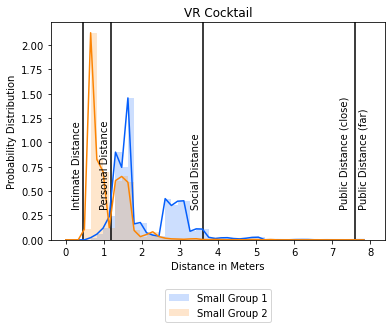

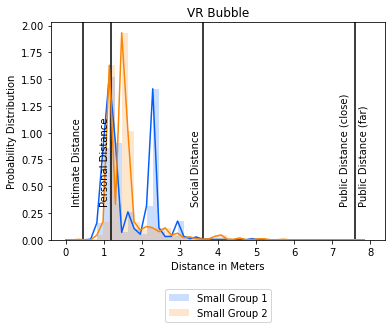

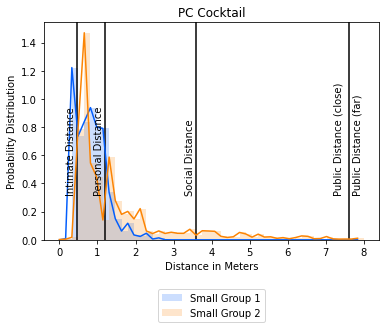

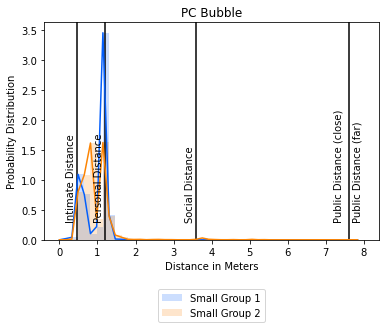

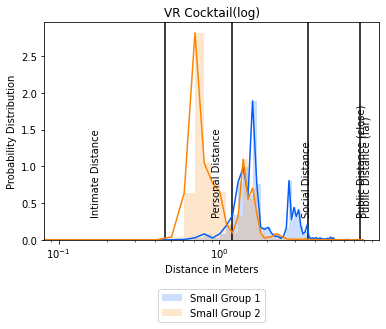

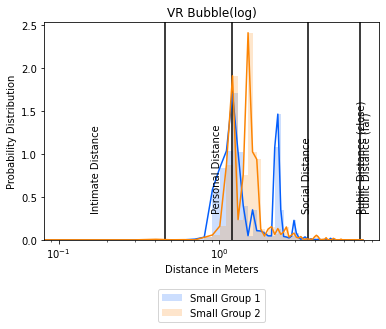

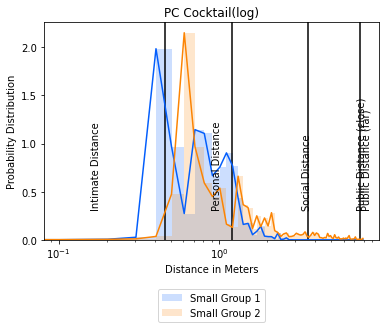

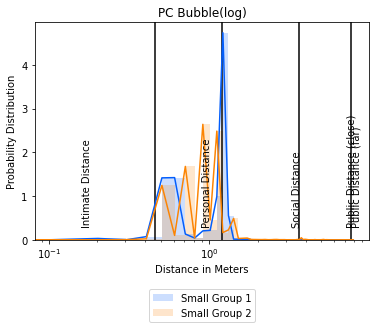

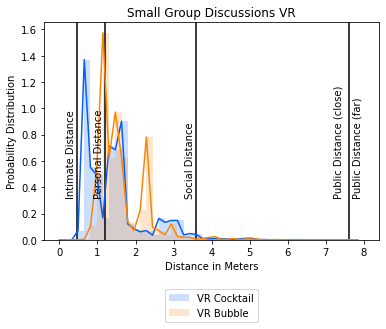

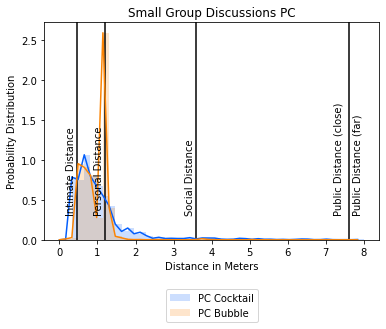

In [53]:
draw_freq("VR Cocktail", [g1_1, g1_2], ["Small Group 1", "Small Group 2"])
draw_freq("VR Bubble", [g2_1, g2_2], ["Small Group 1", "Small Group 2"])
draw_freq("PC Cocktail", [g3_1, g3_2], ["Small Group 1", "Small Group 2"])
draw_freq("PC Bubble", [g4_1, g4_2], ["Small Group 1", "Small Group 2"])


draw_freq("VR Cocktail", [g1_1, g1_2], ["Small Group 1", "Small Group 2"], log=True, n_bins=80)
draw_freq("VR Bubble", [g2_1, g2_2], ["Small Group 1", "Small Group 2"], log=True, n_bins=80)
draw_freq("PC Cocktail", [g3_1, g3_2], ["Small Group 1", "Small Group 2"], log=True, n_bins=80)
draw_freq("PC Bubble", [g4_1, g4_2], ["Small Group 1", "Small Group 2"], log=True, n_bins=80)


# draw_freq("Small Group Discussions VR", [np.append(g1_1, g1_2), np.append(g2_1, g2_2)], ["VR Cocktail", "VR Bubble"])
# draw_freq("Small Group Discussions PC", [np.append(g3_1, g3_2), np.append(g4_1, g4_2)], ["PC Cocktail", "PC Bubble"])

### Figure 1

Closest standing distance during small group discussions.

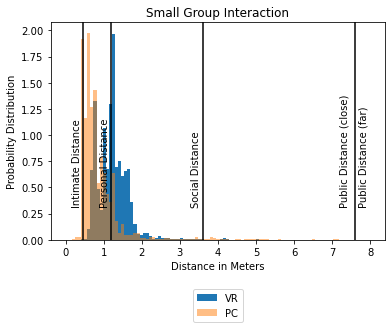

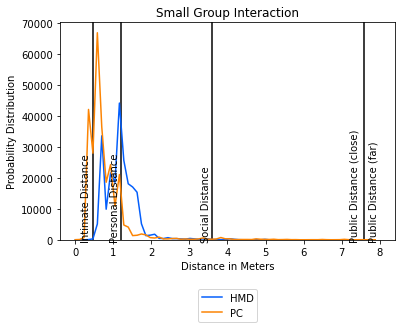

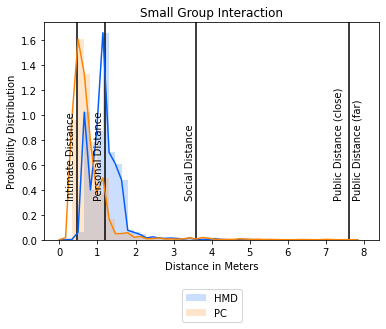

In [61]:
plt.figure()
bins = np.linspace(0, 8.0, 100)

plt.hist(np.append(g1, g2), 
                             bins=bins, 
                             density=True, 
                             # color="#fc8403",
                             label="VR")

plt.hist(np.append(g3, g4), 
                             bins=bins, 
                             alpha=0.5, 
                             density=True, 
                             # color="#fc8403",
                             label="PC") 

plt.title("Small Group Interaction")

plt.xlabel("Distance in Meters")
plt.ylabel("Probability Distribution")
plt.axvline(x=.46,  c='black')
plt.axvline(x=1.2, c='black')
plt.axvline(x=3.6 , c='black')
plt.axvline(x=7.6 , c='black')
plt.text(.16, .33, "Intimate Distance", rotation=90)
plt.text(.9, .33, "Personal Distance", rotation=90)
plt.text(3.3, .33, "Social Distance", rotation=90)
plt.text(7.2, .33, "Public Distance (close)", rotation=90)
plt.text(7.7, .33, "Public Distance (far)", rotation=90)

lgd = plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))

plt.savefig('outputs/closest_pcVR_smallgroup.pdf',
            bbox_extra_artists=(lgd,),
            bbox_inches='tight',
            format='pdf',
            dpi=1200)

def draw_freq_paper(title, groups, labels, log=False, draw_line = True, n_bins=70):

    bins = np.linspace(0, 8.0, n_bins)
        
    
    colours = ["#035efc", "#fc8403"]

    plt.figure()
    if log:
        plt.xscale('log')
        title = title + "(log)"
    plt.title(title)
    plt.axvline(x=.46,  c='black')
    plt.axvline(x=1.2, c='black')
    plt.axvline(x=3.6 , c='black')
    plt.axvline(x=7.6 , c='black')
    plt.text(.16, .07, "Intimate Distance", rotation=90)
    plt.text(.9, .07, "Personal Distance", rotation=90)
    plt.text(3.3, .07, "Social Distance", rotation=90)
    plt.text(7.2, .07, "Public Distance (close)", rotation=90)
    plt.text(7.7, .07, "Public Distance (far)", rotation=90)
    
    plt.xlabel("Distance in Meters")
    plt.ylabel("Probability Distribution")

    for i in range(len(groups)):
        
        n, b, patches = plt.hist(groups[i], bins, alpha=.0, color=colours[i%2])
        
        if draw_line:
            plt.plot(b[:-1], n, color=colours[i%2], label=labels[i])
        
    lgd = plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
        
    plt.savefig('outputs/'+ title +'.pdf',
            bbox_extra_artists=(lgd,),
            bbox_inches='tight',
            format='pdf',
            dpi=1200)



draw_freq_paper("Small Group Interaction", [np.append(g1, g2), np.append(g3,g4)], ["HMD", "PC"], draw_line=True)



draw_freq("Small Group Interaction", [np.append(g1, g2), np.append(g3,g4)], ["HMD", "PC"], draw_line=True)




95274
129546


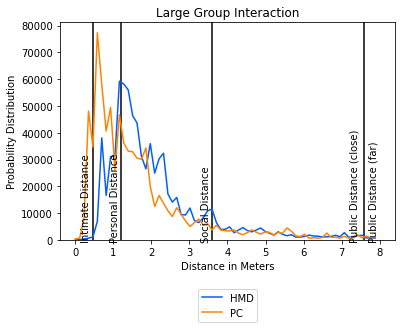

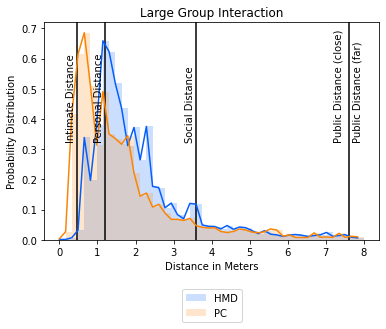

In [62]:

# Large GROUPS
vr = np.append(loaded_matrices["group_1d"]["mins_by_frame"][~np.isnan(loaded_matrices["group_1d"]["mins_by_frame"])].flatten(), loaded_matrices["group_2d"]["mins_by_frame"][~np.isnan(loaded_matrices["group_2d"]["mins_by_frame"])].flatten())
print(len(g1))
pc = np.append(loaded_matrices["group_3d"]["mins_by_frame"][~np.isnan(loaded_matrices["group_3d"]["mins_by_frame"])].flatten(), loaded_matrices["group_4d"]["mins_by_frame"][~np.isnan(loaded_matrices["group_4d"]["mins_by_frame"])].flatten())
print(len(g2))
# g3 = np.append(loaded_matrices["group3_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group3_1"]["mins_by_frame"])].flatten(), loaded_matrices["group3_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group3_2"]["mins_by_frame"])].flatten())
# print(len(g3))
# g4 = np.append(loaded_matrices["group4_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group4_1"]["mins_by_frame"])].flatten(), loaded_matrices["group4_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group4_2"]["mins_by_frame"])].flatten())
# print(len(g4))

#draw_freq_paper("Small Group Interaction", [np.append(g1, g2), np.append(g3,g4)], ["HMD", "PC"], draw_line=True)



draw_freq_paper("Large Group Interaction" , [vr, pc], ["HMD", "PC"], draw_line=True )
draw_freq("Large Group Interaction" , [vr, pc], ["HMD", "PC"], draw_line=True )



95274
129546
168090
107547


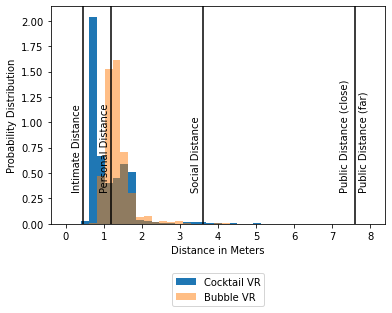

In [307]:
cocktail_1 = np.append(loaded_matrices["group1_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group1_1"]["mins_by_frame"])].flatten(), loaded_matrices["group1_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group1_2"]["mins_by_frame"])].flatten())
print(len(g1))
bubble_2 = np.append(loaded_matrices["group2_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group2_1"]["mins_by_frame"])].flatten(), loaded_matrices["group2_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group2_2"]["mins_by_frame"])].flatten())
print(len(g2))
cocktail_3 = np.append(loaded_matrices["group3_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group3_1"]["mins_by_frame"])].flatten(), loaded_matrices["group3_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group3_2"]["mins_by_frame"])].flatten())
print(len(g3))
bubble_4 = np.append(loaded_matrices["group4_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group4_1"]["mins_by_frame"])].flatten(), loaded_matrices["group4_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group4_2"]["mins_by_frame"])].flatten())
print(len(g4))


plt.figure()
bins = np.linspace(0, 8.0, 40)

n1, bins, patches = plt.hist(cocktail_1, 
                             bins=bins, 
                             density=True, 
                             # color="#fc8403",
                             label="Cocktail VR")

n2, bins, patches = plt.hist(bubble_2, 
                             bins=bins, 
                             alpha=0.5, 
                             density=True, 
                             # color="#fc8403",
                             label="Bubble VR") 

# n3, bins, patches = plt.hist(cocktail_3, 
#                              bins=bins, 
#                              alpha=0.5, 
#                              density=True, 
#                              # color="#fc8403",
#                              label="Cocktail PC") 

# n3, bins, patches = plt.hist(bubble_4, 
#                              bins=bins, 
#                              alpha=0.5, 
#                              density=True, 
#                              # color="#fc8403",
#                              label="Bubble PC") 

# n3, bins, patches = plt.hist(g3, 
#                              bins=bins, 
#                              density=True, 
#                              color="#035efc",
#                              label="PC Cocktail")

# n4, bins, patches = plt.hist(g4, 
#                              bins=bins, 
#                              alpha=0.5, 
#                              density=True, 
#                              color="#035efc",
#                              label="PC Bubble") 



plt.xlabel("Distance in Meters")
plt.ylabel("Probability Distribution")
plt.axvline(x=.46,  c='black')
plt.axvline(x=1.2, c='black')
plt.axvline(x=3.6 , c='black')
plt.axvline(x=7.6 , c='black')
plt.text(.16, .33, "Intimate Distance", rotation=90)
plt.text(.9, .33, "Personal Distance", rotation=90)
plt.text(3.3, .33, "Social Distance", rotation=90)
plt.text(7.2, .33, "Public Distance (close)", rotation=90)
plt.text(7.7, .33, "Public Distance (far)", rotation=90)

lgd = plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))

plt.savefig('outputs/closest_audio_vr.pdf',
            bbox_extra_artists=(lgd,),
            bbox_inches='tight',
            format='pdf',
            dpi=1200)

95274
129546
168090
107547


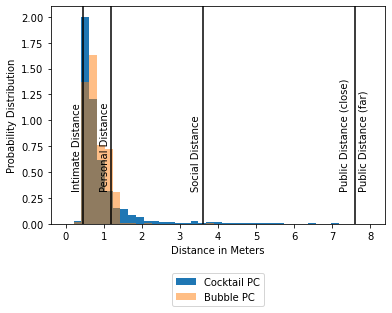

In [308]:
cocktail_1 = np.append(loaded_matrices["group1_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group1_1"]["mins_by_frame"])].flatten(), loaded_matrices["group1_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group1_2"]["mins_by_frame"])].flatten())
print(len(g1))
bubble_2 = np.append(loaded_matrices["group2_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group2_1"]["mins_by_frame"])].flatten(), loaded_matrices["group2_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group2_2"]["mins_by_frame"])].flatten())
print(len(g2))
cocktail_3 = np.append(loaded_matrices["group3_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group3_1"]["mins_by_frame"])].flatten(), loaded_matrices["group3_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group3_2"]["mins_by_frame"])].flatten())
print(len(g3))
bubble_4 = np.append(loaded_matrices["group4_1"]["mins_by_frame"][~np.isnan(loaded_matrices["group4_1"]["mins_by_frame"])].flatten(), loaded_matrices["group4_2"]["mins_by_frame"][~np.isnan(loaded_matrices["group4_2"]["mins_by_frame"])].flatten())
print(len(g4))


plt.figure()
bins = np.linspace(0, 8.0, 40)

# n1, bins, patches = plt.hist(cocktail_1, 
#                              bins=bins, 
#                              density=True, 
#                              # color="#fc8403",
#                              label="Cocktail VR")

# n2, bins, patches = plt.hist(bubble_2, 
#                              bins=bins, 
#                              alpha=0.5, 
#                              density=True, 
#                              # color="#fc8403",
#                              label="Bubble VR") 

n3, bins, patches = plt.hist(cocktail_3, 
                             bins=bins, 
#                              alpha=0.5, 
                             density=True, 
                             # color="#fc8403",
                             label="Cocktail PC") 

n3, bins, patches = plt.hist(bubble_4, 
                             bins=bins, 
                             alpha=0.5, 
                             density=True, 
                             # color="#fc8403",
                             label="Bubble PC") 

# n3, bins, patches = plt.hist(g3, 
#                              bins=bins, 
#                              density=True, 
#                              color="#035efc",
#                              label="PC Cocktail")

# n4, bins, patches = plt.hist(g4, 
#                              bins=bins, 
#                              alpha=0.5, 
#                              density=True, 
#                              color="#035efc",
#                              label="PC Bubble") 



plt.xlabel("Distance in Meters")
plt.ylabel("Probability Distribution")
plt.axvline(x=.46,  c='black')
plt.axvline(x=1.2, c='black')
plt.axvline(x=3.6 , c='black')
plt.axvline(x=7.6 , c='black')
plt.text(.16, .33, "Intimate Distance", rotation=90)
plt.text(.9, .33, "Personal Distance", rotation=90)
plt.text(3.3, .33, "Social Distance", rotation=90)
plt.text(7.2, .33, "Public Distance (close)", rotation=90)
plt.text(7.7, .33, "Public Distance (far)", rotation=90)

lgd = plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))

plt.savefig('outputs/closest_audio_pc.pdf',
            bbox_extra_artists=(lgd,),
            bbox_inches='tight',
            format='pdf',
            dpi=1200)

### Figure 2

Radial plot showing where people stand and who is speaking.


In [31]:
group = "group_4d"

dist_mat = loaded_matrices[group]["dist_mat"]
ang_mat = loaded_matrices[group]["angular_mat"]
uuids = loaded_matrices[group]["uuids"]
uuids_ix = loaded_matrices[group]["uuids_ix"]
slc = loaded_matrices[group]["slice"]

In [32]:
slc_indexed = pd.DataFrame(slc)
slc_indexed["frame_id"] = slc_indexed["frame_id"].astype("str")
slc_indexed = slc_indexed.set_index(["frame_id","uuid"])

In [33]:
def get_volume(frame_id, uuid):
        try:
            vol = float(slc_indexed.loc[(frame_id, uuid)].volume)
        except KeyError:
            vol = 0.0
        
        return vol

   

In [34]:
def get_dist_ang_array(dist_mat, ang_mat):
    dists = []
    angs = []
    vols = []
    for k, dist in dist_mat.items():
        ang = ang_mat[k]
        frame_id = k
        vol = [get_volume(frame_id, uuids[ix]) for ix in range(dist.shape[0])]
        vols.append(vol * ang.shape[0])    
        dists.append(dist.ravel())
        angs.append(ang.ravel())
#         dists.append(dist[np.triu_indices(n=dist.shape[0],k=1)].ravel())
#         angs.append(ang[np.triu_indices(n=ang.shape[0], k=1)].ravel())
        
    return np.array(dists), np.array(angs), np.array(vols)

distances, angles, vols = get_dist_ang_array(dist_mat, ang_mat)

In [35]:
def make_xys(dist, ang):
    # return xs and ys
    return  dist * np.sin(ang), dist * -np.cos(ang)
    
xs, ys = make_xys(distances, angles)

In [36]:
def draw_view_map(xs, ys, vols, pdfname, threshold=0.0):
    figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_aspect("equal")
    ax.axis('off')
    
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

    spekking = vols>=threshold
    non_spekking = vols<threshold
#    
    plt.scatter(xs[non_spekking], ys[non_spekking], alpha=.01, c="grey", s=10)
    plt.scatter(xs[spekking], ys[spekking], alpha=0.2, c='r', s=10)
   
    
#     ax = sns.kdeplot(x=xs, y=ys,cmap=plt.cm.inferno, shade=True)

    c = Circle((0,0), 1.2, color='grey', linewidth=1, fill=None, clip_on=True)
    ax.add_patch(c)

    c = Circle((0,0), .1, color='grey', linewidth=1, clip_on=True)
    ax.add_patch(c)

    c = Circle((0,0), 3.6, color='grey',fill=None, linewidth=1, clip_on=True)
    ax.add_patch(c)

    x1, y1 = [0, 3.6*np.sin(np.radians(-40))], [0, 3.6*np.cos(np.radians(-40))]
    x2, y2 = [0, 3.6*np.sin(np.radians(40))], [0, 3.6*np.cos(np.radians(40))]
    plt.plot(x1, y1, x2, y2, c='grey', marker = None)
    
#     plt.gca().set_facecolor("#09061F")
    plt.savefig(pdfname)

(64243, 64) (64243, 64)


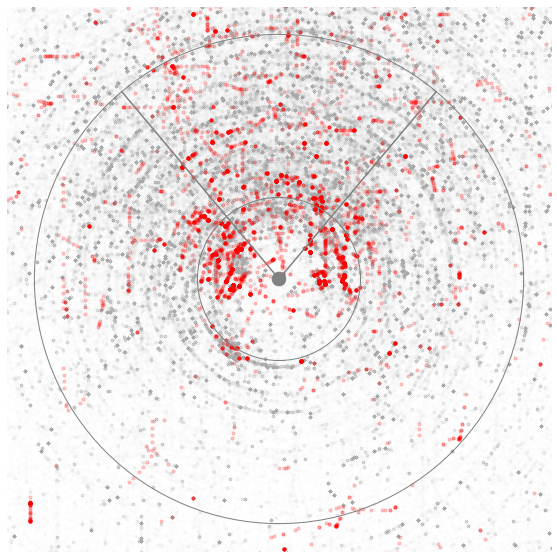

In [37]:
# plt.scatter(xs[:,0], ys[:,0], s=1, alpha=0.05)
# plt.scatter(xs.ravel()[below_threshold], ys.ravel()[below_threshold], s=10, alpha=0.01, c='grey')
# plt.scatter(xs.ravel()[above_threshold], ys.ravel()[above_threshold], s=10, alpha=0.2, c='r')

#remove 0's
non_zeros = xs.ravel()!= 0.0
xs_noo = xs.ravel()[non_zeros]
ys_noo = ys.ravel()[non_zeros]
print(xs.shape, vols.shape)
vols_noo = vols.ravel()[non_zeros]

vol_threshold = 0.3
spekking = vols_noo>vol_threshold
non_spekking = vols<vol_threshold

draw_view_map(xs_noo, ys_noo, vols_noo, "PC_big_group_4_radial", threshold=.3)
# draw_view_map(xs_noo[spekking], ys_noo[spekking], vols_noo[spekking], "vr_small_group_speaking")


Next visit the <a href="4.Animate.ipynb">Animate</a> notebook.
